In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
from matplotlib import pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames: 
        print(os.path.join(dirname, filename))

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
input_path = "/kaggle/input/icr-identify-age-related-conditions/"
work_path = os.getcwd()
work_path

'/kaggle/working'

In [3]:
df_train_file = pd.read_csv(input_path + 'train.csv')
df_train_file.sample(10)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
391,98102929d244,0.311929,4806.67902,292.021479,6.869146,11.911746,4.526949,0.032886,13.360240,5.808642,...,9.444089,1.72057,0.257374,15.962232,72.611063,5497.676226,30.240567,56.424536,0.066575,1
263,684d62aeae9e,0.282018,4374.06530,116.326113,46.993878,8.138688,7.104918,0.057246,8.602230,1.229900,...,7.795305,0.49706,0.067730,27.589732,72.611063,7069.258800,34.315062,34.930332,0.169714,0
530,d482356ae08f,2.179230,5618.94234,85.200147,584.688824,50.253252,7.211226,0.025578,11.835156,1.229900,...,24.316014,0.49706,0.264147,22.008532,72.611063,10738.557100,27.014460,155.876060,0.001414,1
79,1ce075e25399,0.572582,4889.85805,98.106885,15.822573,8.138688,4.930034,0.025578,11.293184,8.363320,...,3.559500,0.49706,0.223509,21.934116,78.419418,1345.814190,27.155858,17.210538,0.066000,1
150,3bbe922b2cdb,0.700772,5563.78570,241.056411,38.292856,8.138688,3.698632,0.138243,12.191219,643.553960,...,6.243271,13.32376,0.067730,21.701566,72.611063,1051.098444,66.016121,22.847076,0.105133,1
584,f13b1485ba1f,0.243561,4701.43080,85.200147,9.829878,8.138688,2.790585,0.025578,11.627190,1.229900,...,7.307019,0.49706,0.819533,7.162540,229.847429,8514.953280,16.711011,42.453432,0.185362,0
397,9b6aeb66b22a,0.260653,3356.52185,85.200147,14.221424,8.138688,4.172589,0.025578,13.549300,1.229900,...,5.308066,0.49706,0.419926,8.129948,251.079948,2410.730100,36.082537,30.591368,0.165767,0
10,06055f3f6785,0.504214,6089.31532,85.200147,189.781063,17.027268,6.201300,10.315851,14.494600,212.628626,...,0.173229,1.98969,0.067730,28.222268,126.449876,12115.894710,81.210825,72.990788,21.978000,1
503,caff00fb82e2,0.538398,4059.43626,85.200147,48.505214,8.138688,4.562385,0.025578,12.137652,1.229900,...,5.396541,1.19480,0.304785,23.961952,72.611063,22659.095840,21.715756,31.743624,0.223431,0
145,3924089e4396,0.730683,1070.72900,123.223641,36.470272,8.138688,4.597821,0.025578,15.698282,1.229900,...,0.173229,1.32936,0.067730,41.700866,72.611063,21042.911590,18.459881,25.727716,21.978000,1


In [4]:
df_train_file.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [5]:
d = df_train_file.describe().transpose()
d['end_jump'] = (d['max'] - d['75%']) / d['75%']
d.nlargest(20,'end_jump')
# Several columns have very few high values

,count,mean,std,min,25%,50%,75%,max,end_jump
Class,617.0,0.175041,0.380310,0.000000,0.000000,0.000000,0.000000,1.000000,inf
FR,617.0,3.533905,50.181948,0.497060,0.497060,1.131000,1.512060,1244.227020,821.868815
FD,617.0,6.930086,64.754262,0.296850,0.296850,1.870155,4.880214,1578.654237,322.480535
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448,287.058091
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851,278.983471
BZ,617.0,550.632525,2076.371275,257.432377,257.432377,257.432377,257.432377,50092.459300,193.584923
BR,617.0,1218.133238,7575.293707,51.216883,424.990642,627.417402,975.649259,179250.252900,182.724070
EH,617.0,0.305107,1.847499,0.003042,0.003042,0.085176,0.237276,42.569748,178.410256
DF,617.0,0.633884,1.912384,0.238680,0.238680,0.238680,0.238680,37.895013,157.769118
DU,616.0,1.802900,9.034721,0.005518,0.005518,0.251741,1.058690,161.355315,151.410423


<Axes: >

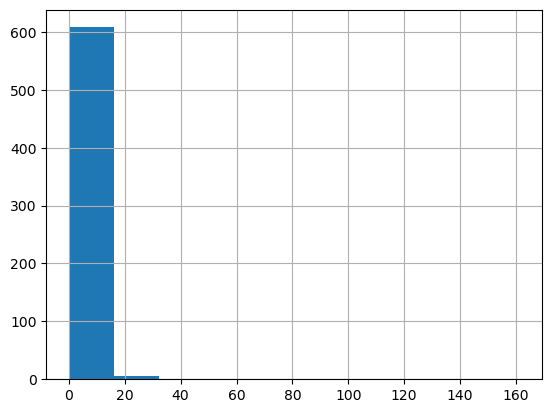

In [6]:
df_train_file['DU'].hist()

In [7]:
df_train_file.loc[df_train_file['DU'] < 0.1, 'DU'].value_counts() # half of DU are 3 values

0.005518    222
0.006897     45
0.055176      4
0.062073      2
0.013794      2
0.068970      2
0.082764      2
0.096558      1
0.048279      1
0.020691      1
0.034485      1
0.041382      1
0.075867      1
Name: DU, dtype: int64

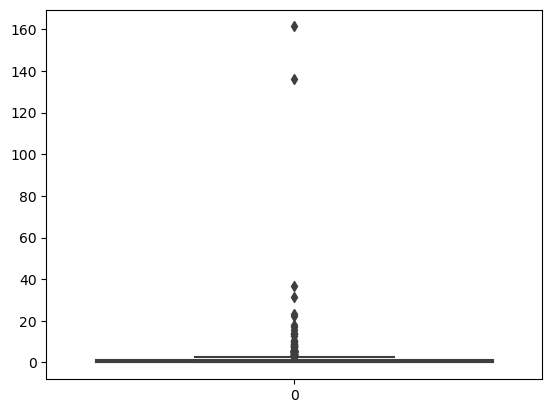

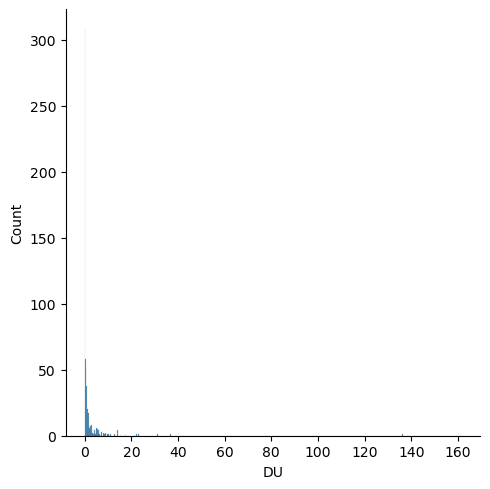

In [8]:
## Data Discovery
sns.boxplot(df_train_file.DU)
sns.displot(df_train_file.DU)


In [9]:
df_train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [10]:
df_train_file.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [11]:
#df_train_file.hist(bins=15, figsize=(15, 6))

In [12]:
correlations = df_train_file.corr(numeric_only=True)
correlations.nlargest(4,'DU')['DU']

DU     1.000000
EH     0.850957
FD     0.805989
FL     0.607507
Name: DU, dtype: float64

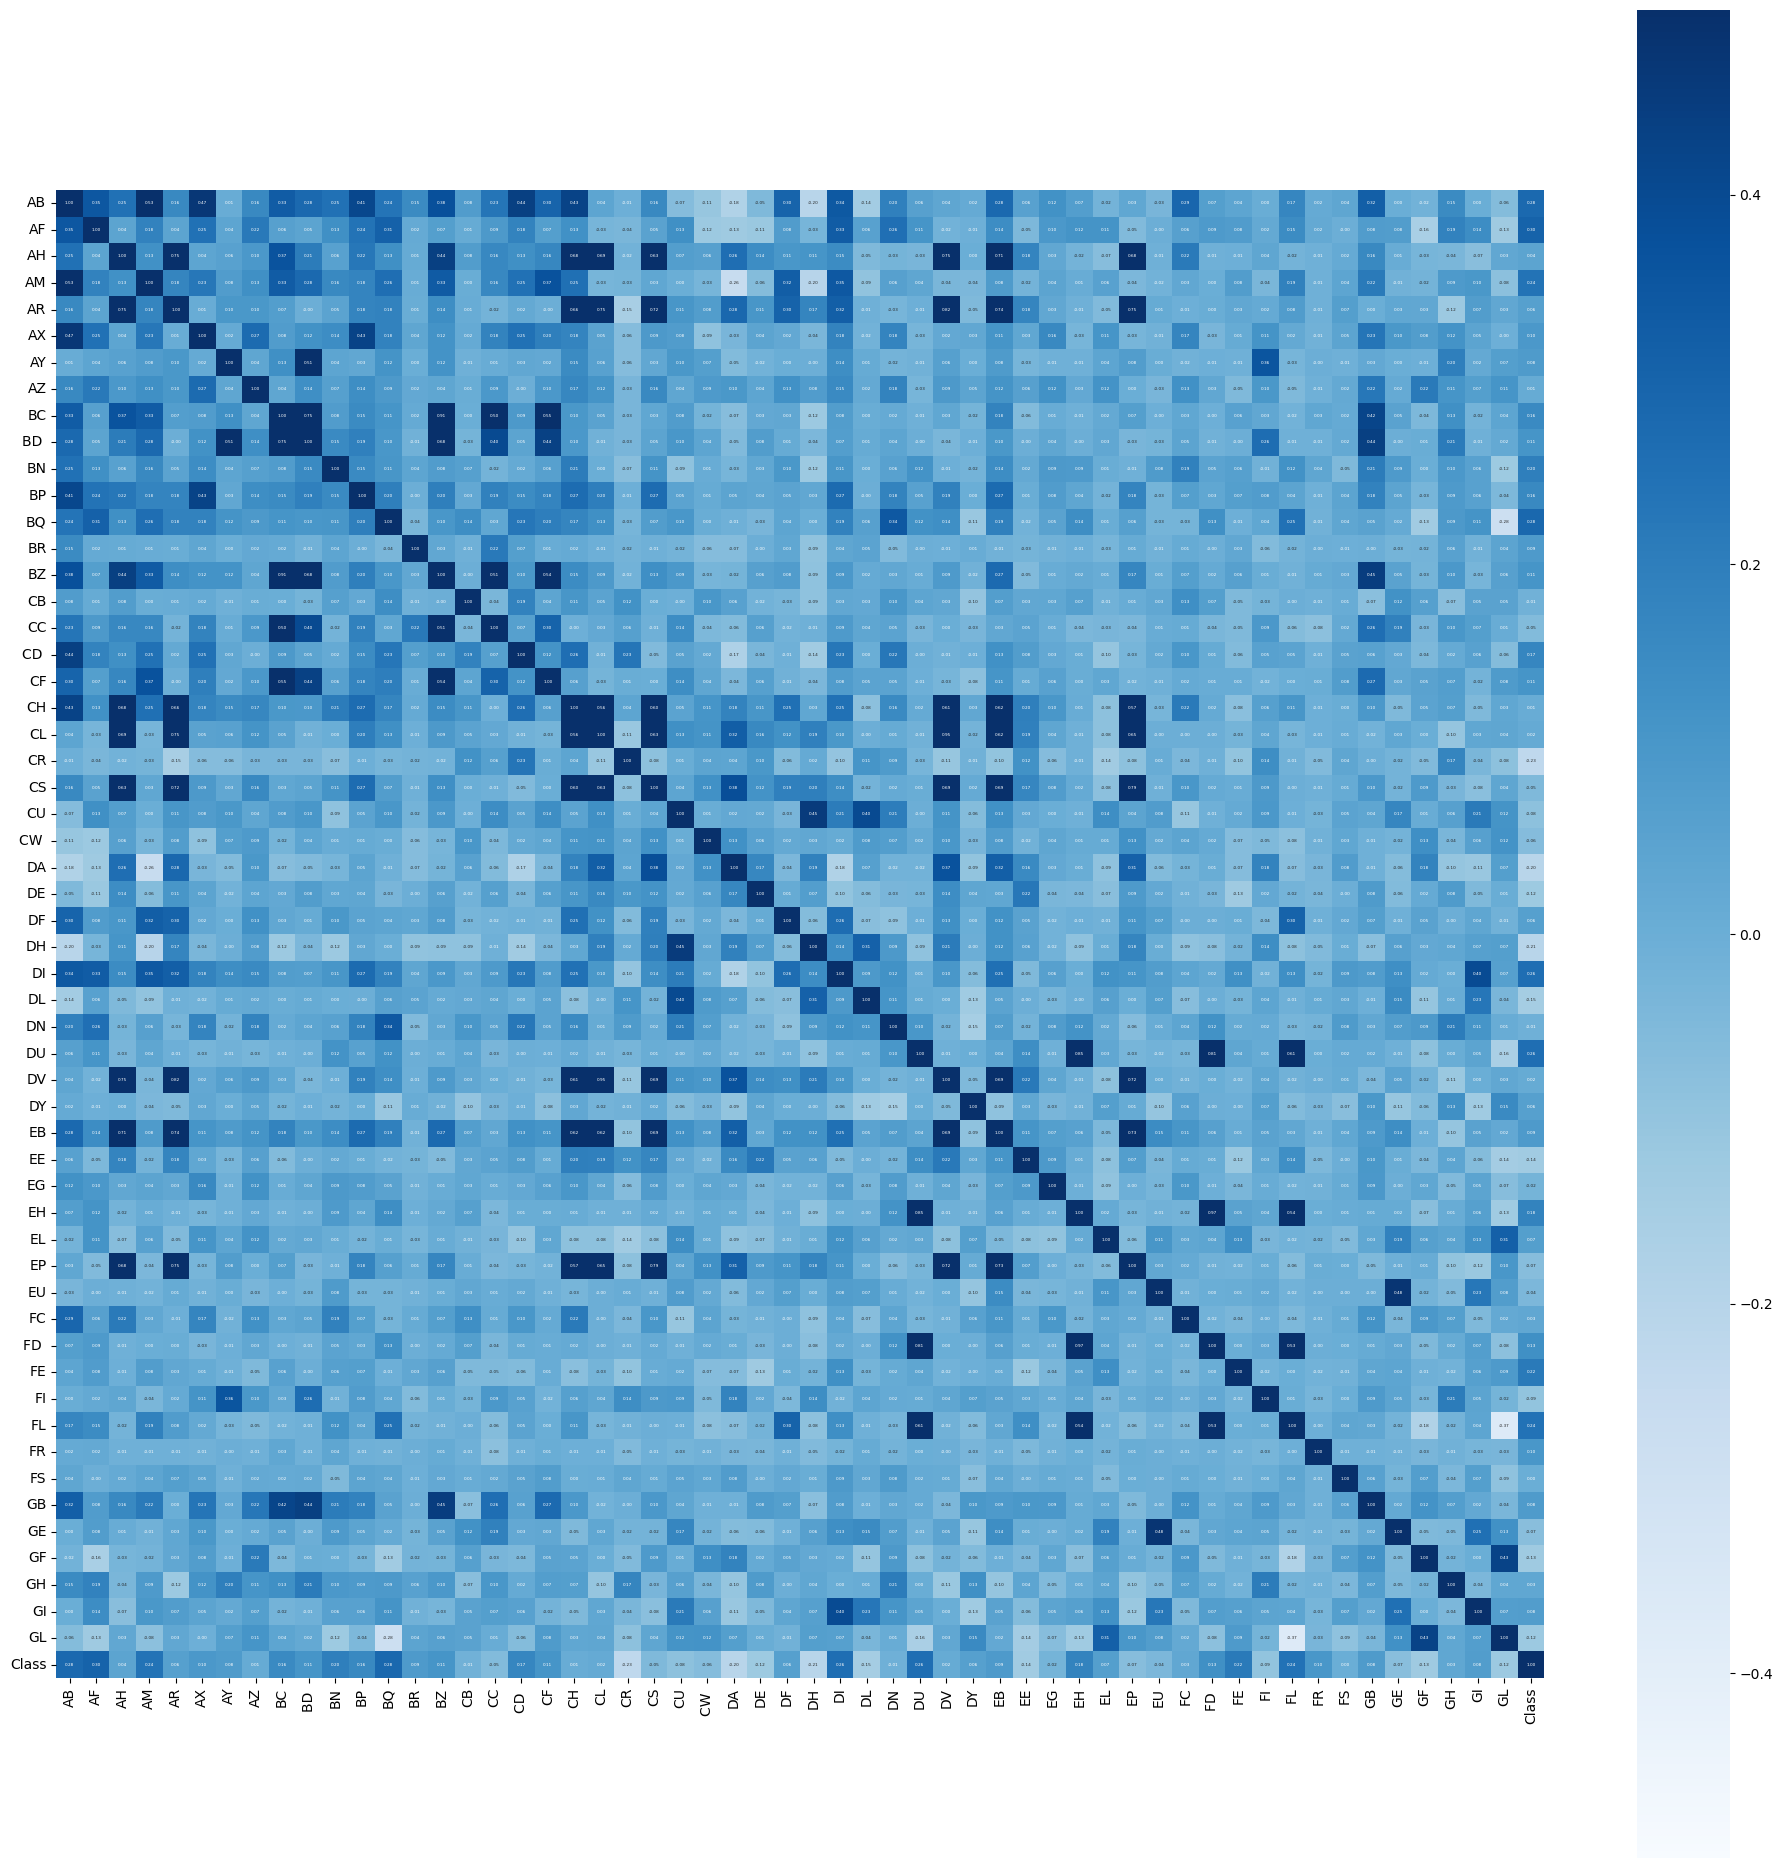

In [13]:
# unreadable: too many columns pd.plotting.scatter_matrix(df_train_file) 
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(correlations, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)
#sns.heatmap(correlations)
plt.savefig('/kaggle/working/corr.png')

In [14]:
df_train_file = df_train_file.fillna(method="ffill")

In [15]:
df_train_file['EJ'].value_counts() # EJ is categorical


B    395
A    222
Name: EJ, dtype: int64

In [16]:
df_train_file['EJ_dummy'] = (df_train_file['EJ'] == 'B')
df_train_file['EJ_dummy'] = df_train_file['EJ_dummy'].astype('float64')
df_train_file['EJ_dummy'].sample(10)

502    0.0
191    1.0
175    0.0
339    1.0
300    1.0
15     1.0
187    0.0
184    0.0
22     0.0
600    1.0
Name: EJ_dummy, dtype: float64

In [17]:
df_train_x = df_train_file.loc[:, (df_train_file.columns != 'Class') & (df_train_file.columns != 'Id') & (df_train_file.columns != 'EJ')]
df_train_y = df_train_file['Class']
df_train_x

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,EJ_dummy
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,1.0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,1.0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0.0
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,1.0
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0.0
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,1.0


<Axes: xlabel='GF', ylabel='DU'>

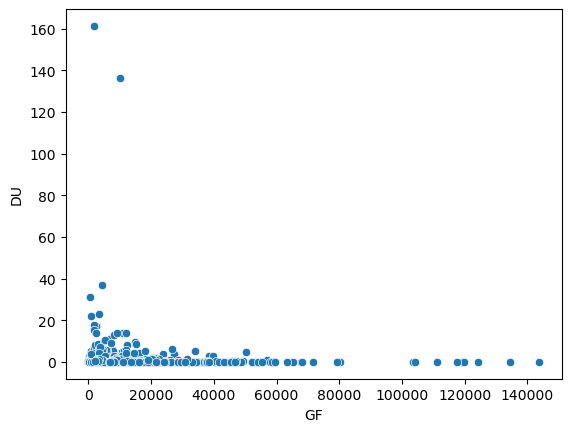

In [18]:
sns.scatterplot(x='GF', y='DU', data=df_train_file)

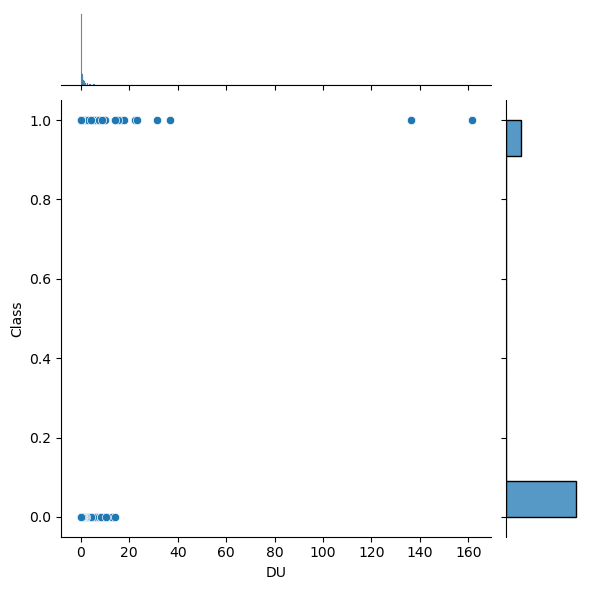

In [19]:
sns.jointplot(x='DU', y='Class', data=df_train_file)

In [20]:
clf = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
clf.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)

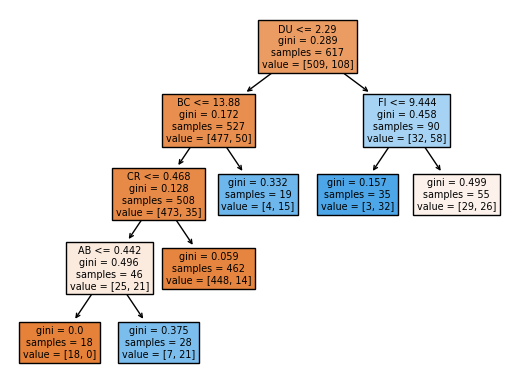

In [21]:
tree.plot_tree(clf, feature_names=df_train_x.columns, filled=True)
plt.show()

* EJ is categorical everything else numerical
* Most predictive columns are DU, BC, CR
* Several columns have very few high values, beware the validation set
* several columns are very correlated like DU, EH, FD


## Looking at the additional file


In [22]:
df_greek_file = pd.read_csv(input_path + 'greeks.csv')
df_greek_file.sample(10)

,Id,Alpha,Beta,Gamma,Delta,Epsilon
379,92b3778f624f,A,B,M,B,9/15/2020
526,d3ce7974230c,G,A,B,A,9/16/2014
501,ca3ae6c8dede,A,C,N,B,7/8/2020
449,b10bae274dfc,A,C,M,B,Unknown
438,adb67a0dd661,A,C,M,B,Unknown
48,135f1d1da85e,A,C,M,B,1/31/2019
198,4d4e63393080,A,C,N,B,4/12/2019
472,bbbb36522060,A,C,M,B,4/24/2019
86,21b3d18c0340,A,C,M,B,6/26/2019
248,62176aa5de57,A,C,N,B,4/24/2019


In [23]:
df_greek_file.describe()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
count,617,617,617,617,617,617
unique,617,4,3,8,4,198
top,000ff2bfdfe9,A,C,M,B,Unknown
freq,1,509,407,445,456,144


In [24]:
df_greek_file.Alpha.value_counts()

A    509
B     61
G     29
D     18
Name: Alpha, dtype: int64

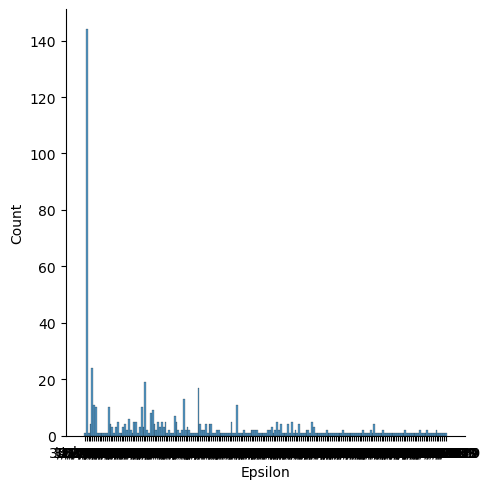

In [25]:
sns.displot(df_greek_file.Epsilon)

In [26]:
df_greek_file.isna().sum()

Id         0
Alpha      0
Beta       0
Gamma      0
Delta      0
Epsilon    0
dtype: int64

In [27]:
df_greek_file.Epsilon.value_counts()

Unknown       144
5/29/2019      24
6/26/2019      19
9/15/2020      17
8/29/2019      13
             ... 
2/21/2019       1
8/13/2019       1
5/18/2020       1
12/20/2019      1
7/24/2019       1
Name: Epsilon, Length: 198, dtype: int64

In [28]:
#df_greek_file.Age = 4 if df_greek_file.Epsilon == 'Unknown' else df_greek_file.Epsilon.to_timestamp()
df_greek_file.loc[df_greek_file['Epsilon'] == 'Unknown', 'Epsilon'] = pd.to_datetime('1/1/2021')
df_greek_file['Epsilon_date'] = pd.to_datetime(df_greek_file.Epsilon)
df_greek_file['Age'] = pd.to_datetime('1/1/2023') - df_greek_file.Epsilon_date
#else pd.to_datetime(df_greek_file.Epsilon)
df_greek_file.sample(20)

,Id,Alpha,Beta,Gamma,Delta,Epsilon,Epsilon_date,Age
413,a20ba8577583,G,C,A,C,11/30/2018,2018-11-30,1493 days
210,514d2ac4fdb5,A,C,M,B,2021-01-01 00:00:00,2021-01-01,730 days
26,0da59360d722,A,C,N,B,3/27/2019,2019-03-27,1376 days
464,b85846bebd78,A,B,M,B,6/11/2020,2020-06-11,934 days
253,65c5772a4afa,A,C,M,B,1/31/2019,2019-01-31,1431 days
519,d1f14dbe348c,A,B,M,A,6/3/2020,2020-06-03,942 days
429,aac8bafe74ef,A,C,M,B,4/24/2019,2019-04-24,1348 days
461,b5b51b3db693,A,C,N,B,10/18/2019,2019-10-18,1171 days
289,73468ffe1cb5,A,C,M,B,2021-01-01 00:00:00,2021-01-01,730 days
377,913b30965ae1,A,C,M,D,7/16/2014,2014-07-16,3091 days


In [29]:
df_greek_file.Age.nlargest(10)

280   3881 days
491   3805 days
190   3098 days
377   3091 days
571   3083 days
256   3078 days
131   3042 days
275   3036 days
526   3029 days
378   2197 days
Name: Age, dtype: timedelta64[ns]

In [30]:
df_greek_x = pd.get_dummies(df_greek_file, columns = ['Alpha', 'Beta', 'Gamma', 'Delta'])
df_greek_x['Age_days'] = df_greek_x['Age'].dt.total_seconds() / (24 * 60 * 60)
df_greek_x = df_greek_x.loc[:, (df_greek_x.columns != 'Age') & (df_greek_x.columns != 'Epsilon_date') & (df_greek_x.columns != 'Id') & (df_greek_x.columns != 'Epsilon')]
df_greek_x.sample(20)

,Alpha_A,Alpha_B,Alpha_D,Alpha_G,Beta_A,Beta_B,Beta_C,Gamma_A,Gamma_B,Gamma_E,Gamma_F,Gamma_G,Gamma_H,Gamma_M,Gamma_N,Delta_A,Delta_B,Delta_C,Delta_D,Age_days
543,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1455.0
560,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,730.0
295,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,845.0
283,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,730.0
446,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,730.0
264,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,730.0
130,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,730.0
546,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1419.0
10,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,922.0
484,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1091.0


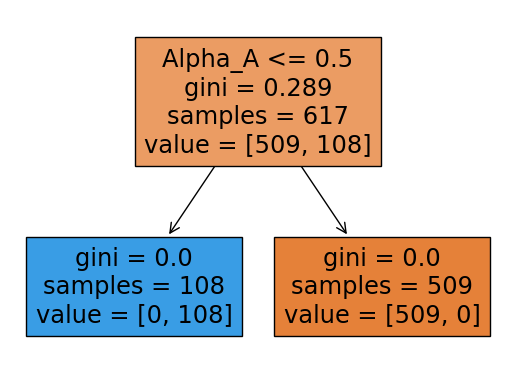

In [31]:
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
clf.fit(df_greek_x, df_train_y)
tree.plot_tree(clf, feature_names=df_greek_x.columns, filled=True)
plt.show()

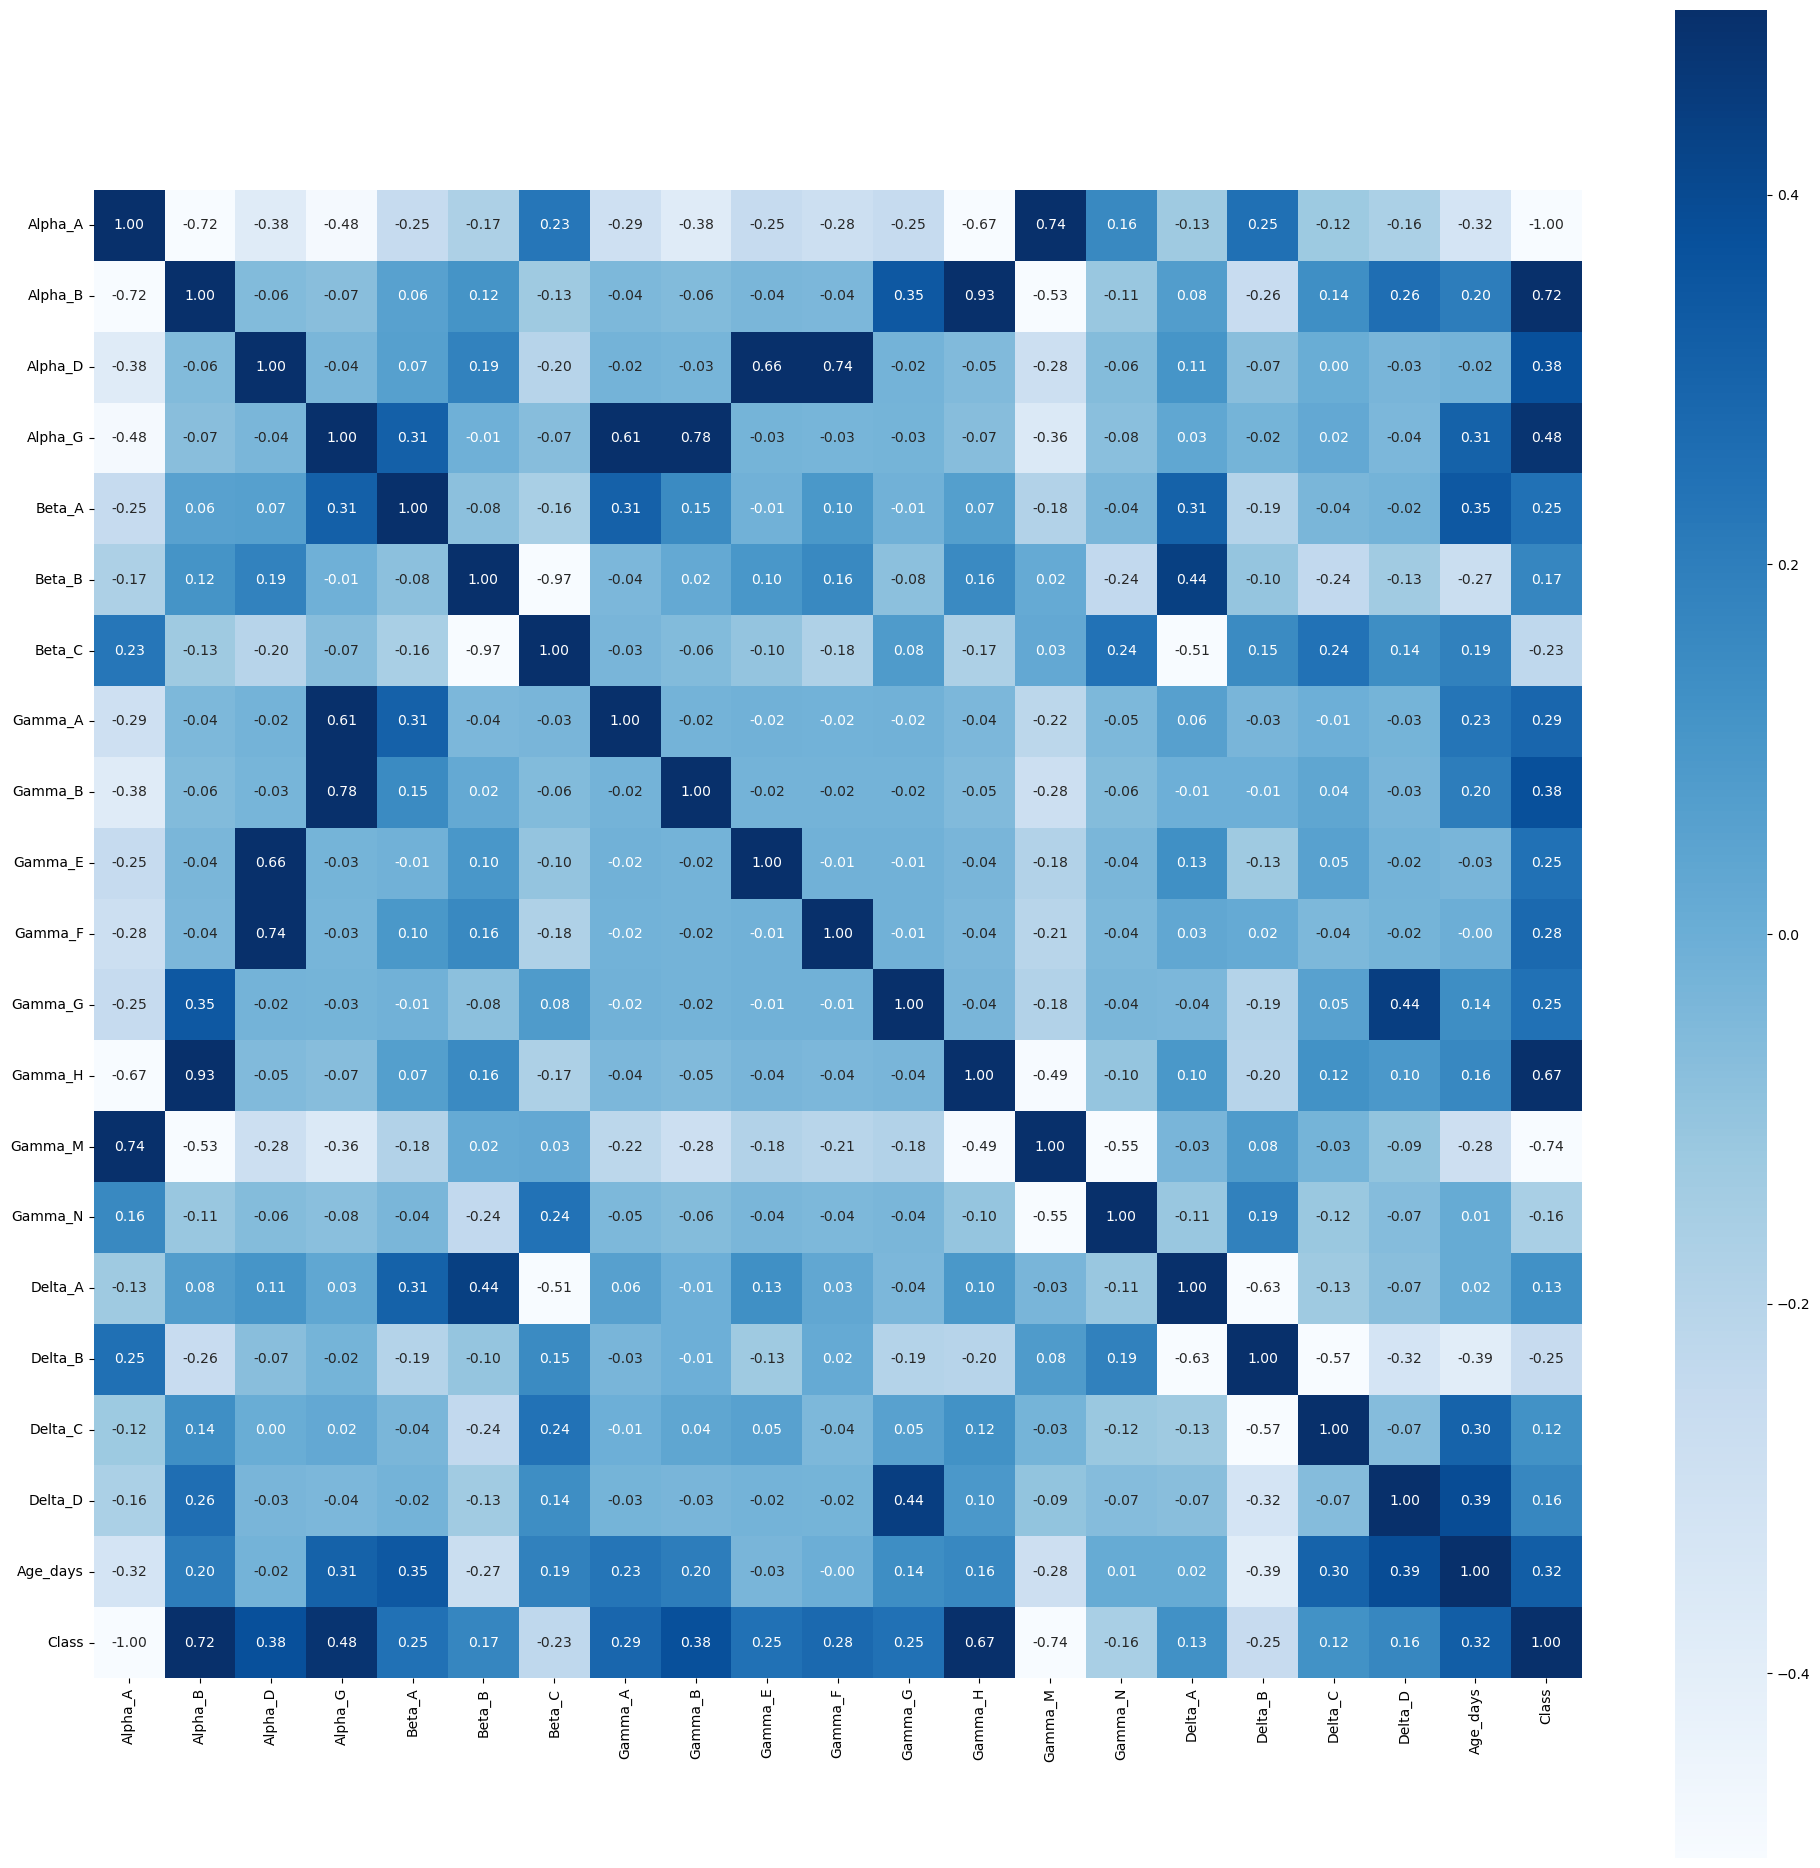

In [32]:
df_greek_agg = pd.concat([df_greek_x, df_train_y], axis=1)
correlations = df_greek_agg.corr(numeric_only=True)
correlations.nlargest(4,'Class')['Class']

fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(correlations, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 10}, annot=True, 
                 square=True, cmap=plt.cm.Blues)
#sns.heatmap(correlations)
plt.savefig('/kaggle/working/corr_greek.png')

In [33]:
df_greek_agg[['Alpha_A', 'Class']].value_counts()

Alpha_A  Class
1        0        509
0        1        108
dtype: int64

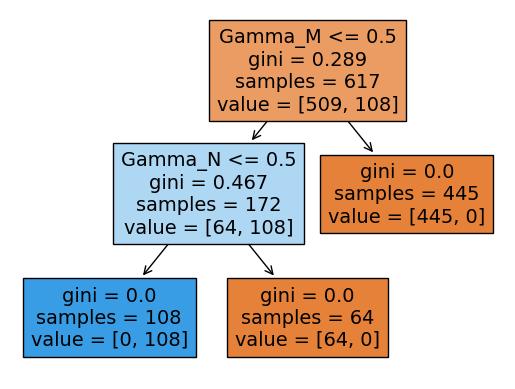

In [37]:
df_greek_x_alt = df_greek_x.loc[:, (df_greek_x.columns != 'Alpha_A')]
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
clf.fit(df_greek_x_alt, df_train_y)
tree.plot_tree(clf, feature_names=df_greek_x_alt.columns, filled=True)
plt.show()

Idea: make a model with greek directly predicting class
* because greek is not available for the test set then one objective could be to predict greek from train and class from greek in order to predict from train to clss